In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# calculate distance between points
def distance(a, b, ax = 1):
    return np.linalg.norm(a - b,axis = 1)

# test whether centoid converged or not
def converge(prev, centroid, error_rate = 0.001):
    conv = True
    if sum(distance(prev, centroid)) > error_rate:
        conv = False
    return conv

In [3]:
def kmeans(x, k, max_iteration = 1000):
    # random select centroid for each feature  
    n_feature = x.shape[1]
    centroid =  np.zeros([k,n_feature])

    for j in range(x.shape[1]):
        centroid[:,j] = np.array(np.max(x.iloc[:,j])*np.random.rand(k),dtype=np.float32)
    
    # variable to store all the cluster results
    clusters = np.zeros(x.shape[0])
    
    conv = False # if the centroid converges, stop while loop
    iters = 0 # or if while loop reaches the max number of iteration, then stop
    while conv is False and iters < max_iteration:
        # calculate the distance between data point and the centroid
        for i in range(x.shape[0]):
            temp = distance(x.loc[i].values.reshape(1,-1),centroid)
            # choose the index of closest data point
            cluster = np.argmin(temp)
            clusters[i] = cluster # store the cluster results for each data point
            
        # save the previous centroid
        prev = centroid.copy()
        # update the centroid by calculating the average for each cluster
        for i in range(k):
            points = [x.loc[j] for j in range(x.shape[0]) if clusters[j] == i]
            centroid[i] = np.mean(points, axis = 0)

        conv = converge(prev, centroid)
        iters += 1
        
    return clusters

Test Case

Text(0.5,1,'Original cluster')

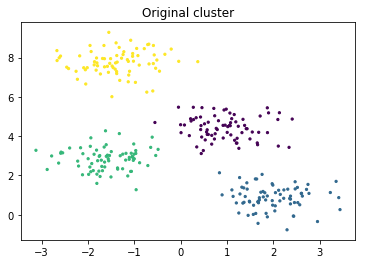

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=5,c = y_true)
plt.title('Original cluster')

In [5]:
x = pd.DataFrame(X)
clus = kmeans(x,4)

Text(0.5,1,'K means Results')

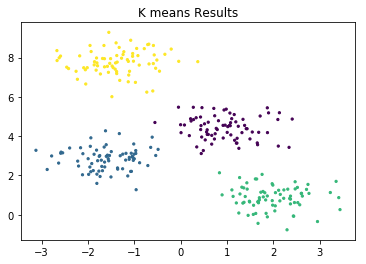

In [6]:
plt.scatter(x.iloc[:,0], x.iloc[:,1],c = clus,
            s=5, cmap='viridis')
plt.title("K means Results")